### suport vector machine

연습문제 1
 - 맞았는지 모르겠다. 다시 볼 필요 있음.

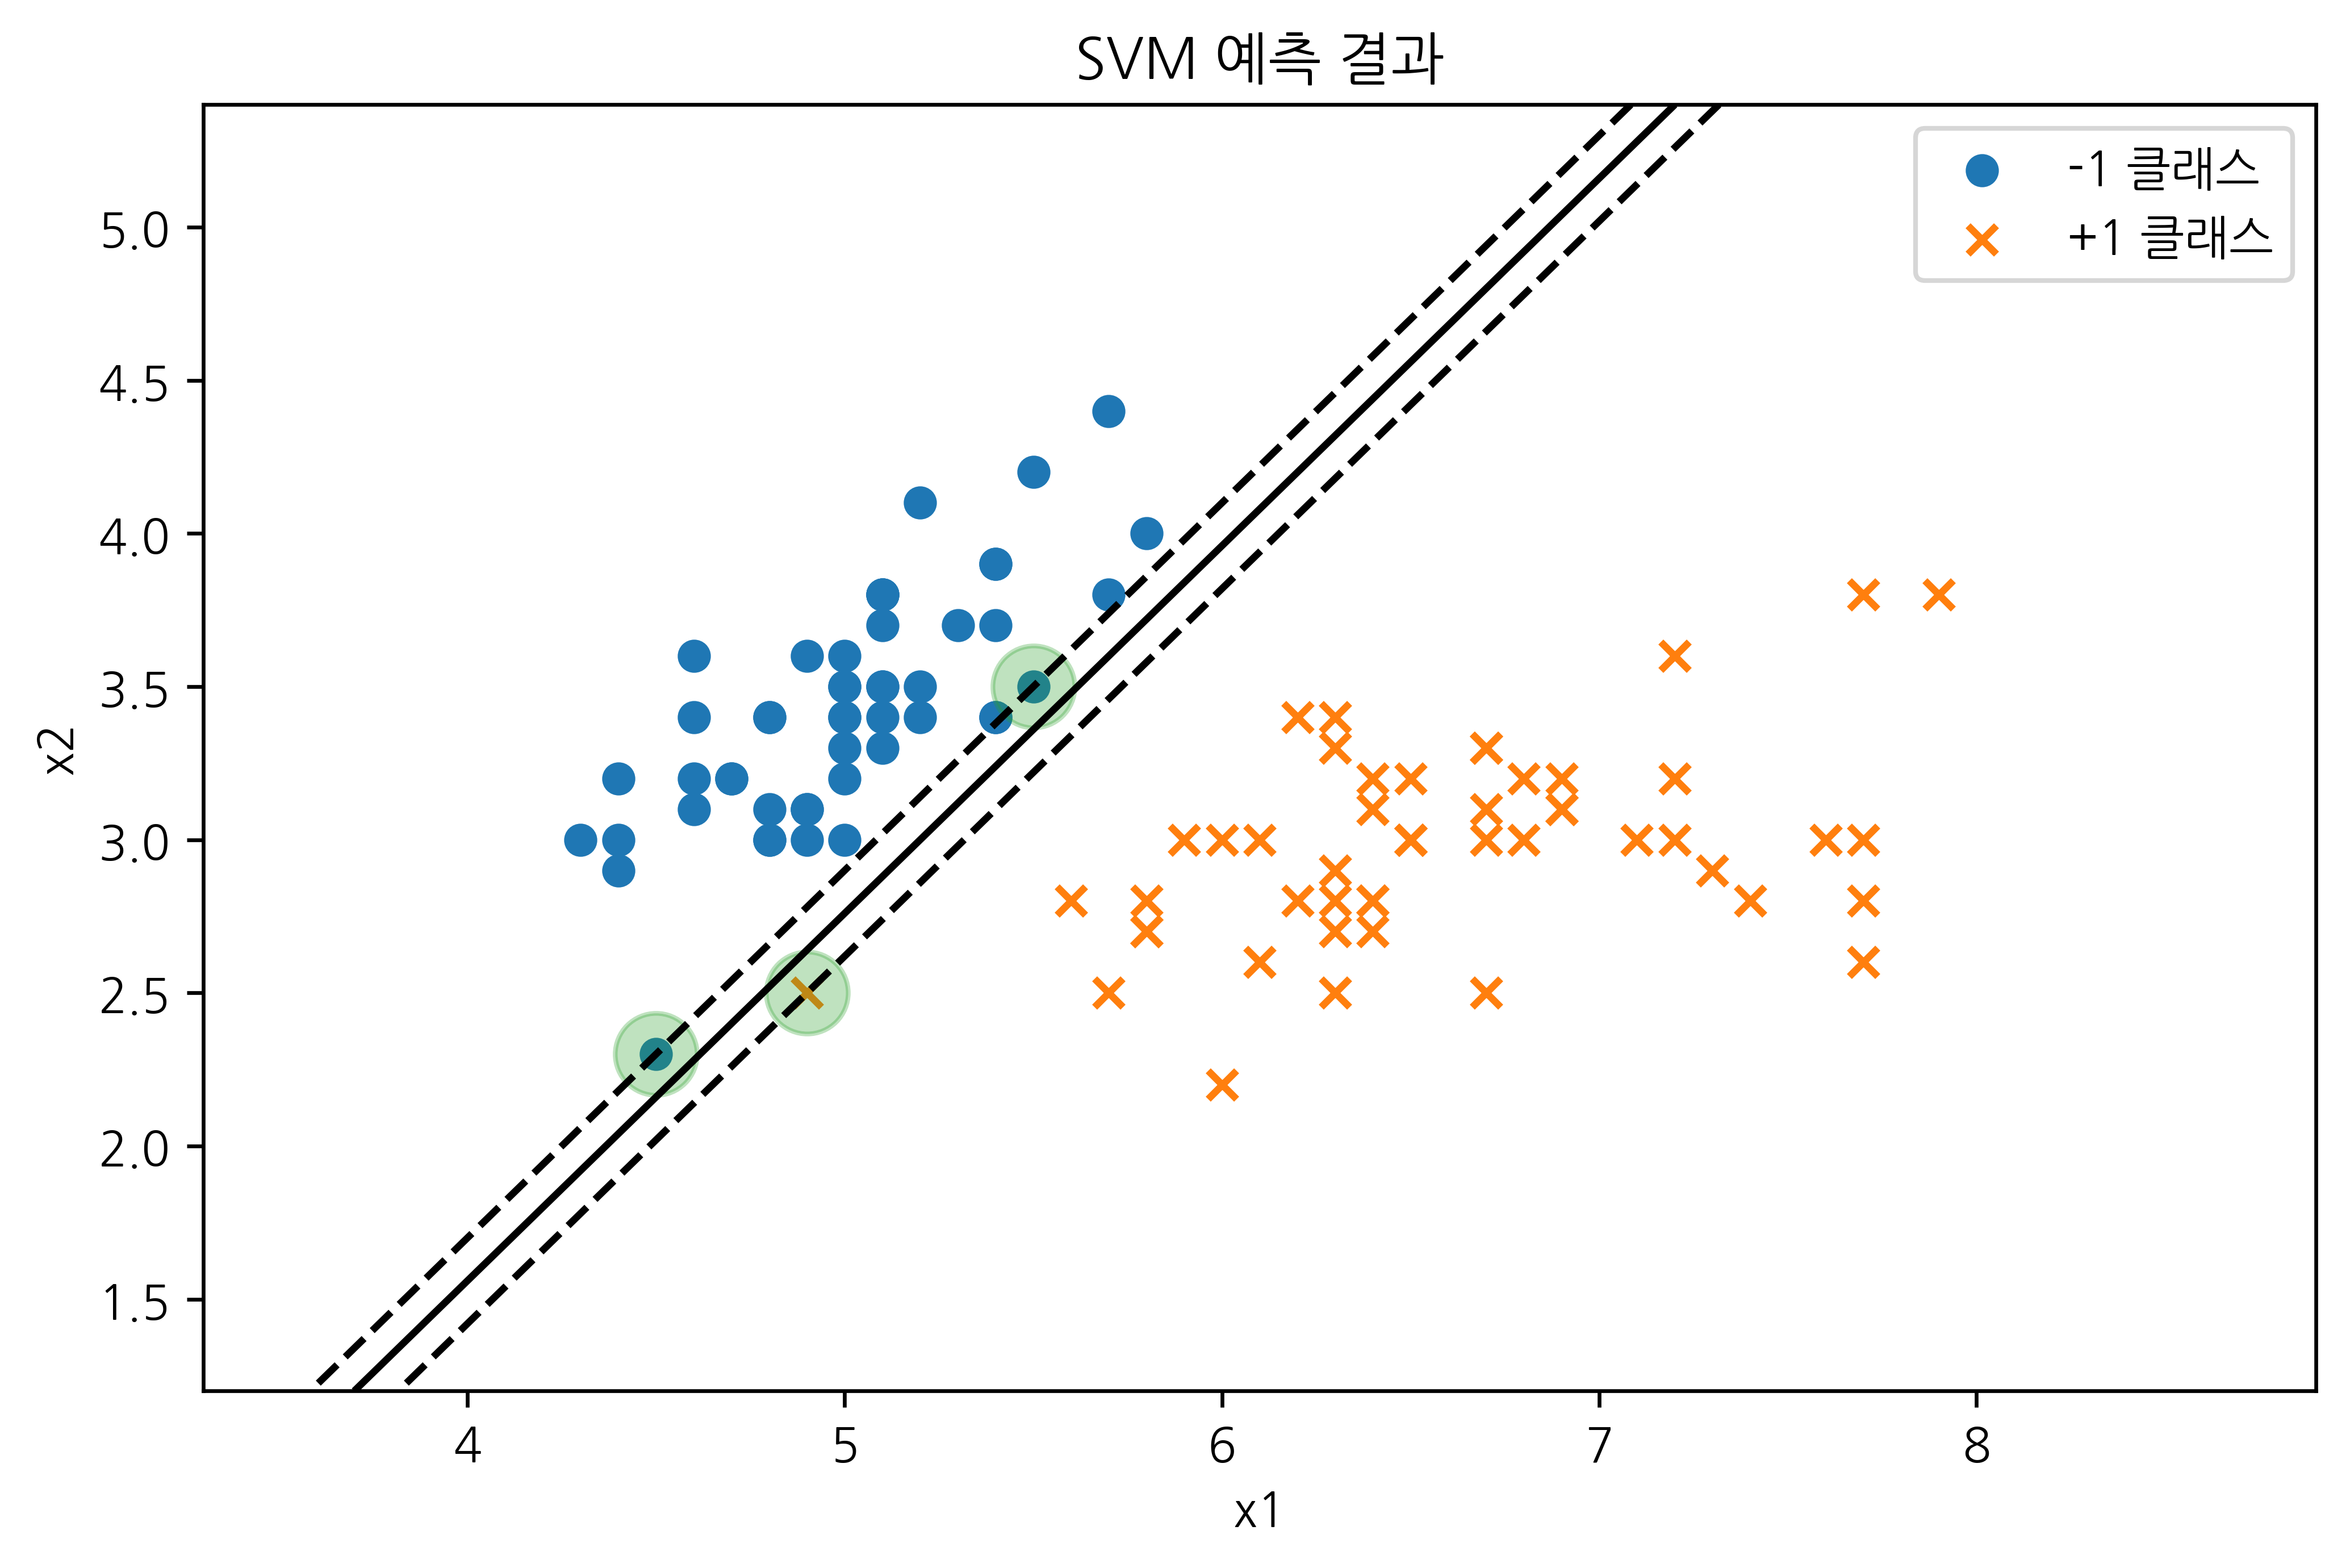

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
xx = np.linspace(XX_min, XX_max)
yy = np.linspace(YY_min, YY_max)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', label="-1 클래스")
plt.scatter(X[y==1, 0], X[y==1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

연습문제2

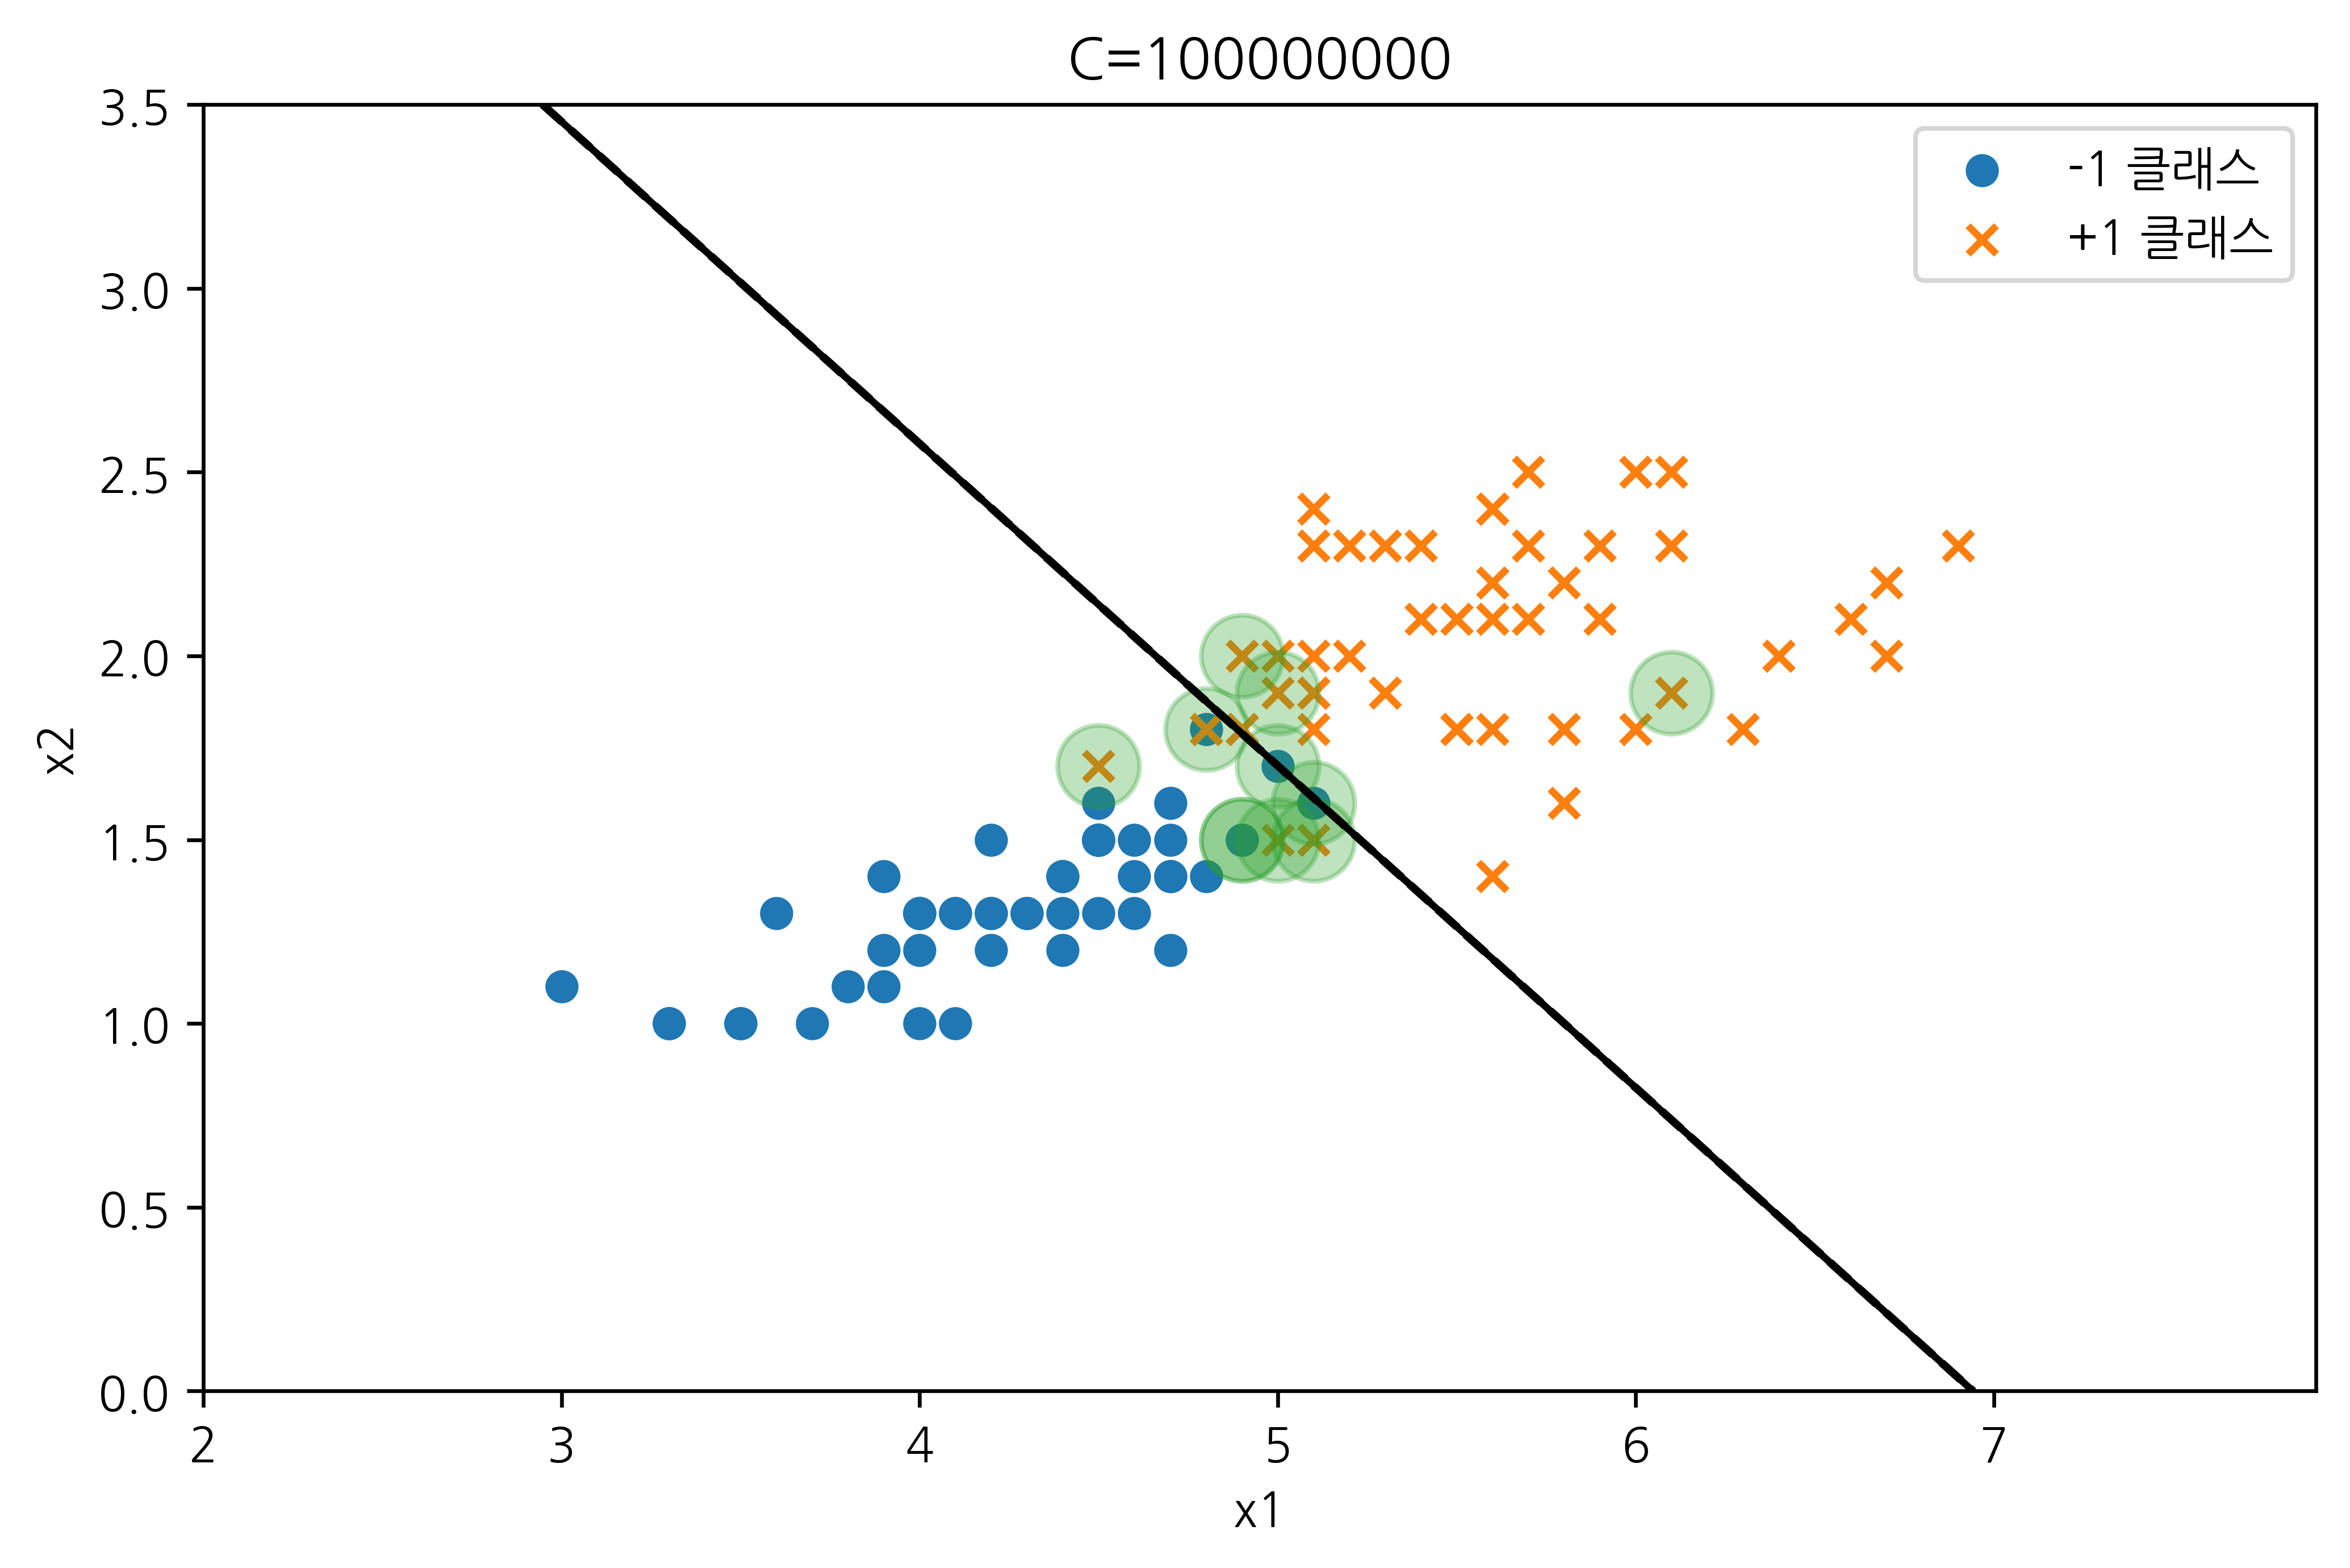

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [1, 2])  ## virginica & versicolour
X = iris.data[idx, 2:4]   ## 꽃잎의 길이와 폭만 사용
y = (iris.target[idx] / 2).astype(np.int)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
xx = np.linspace(XX_min, XX_max)
yy = np.linspace(YY_min, YY_max)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=100000000).fit(X, y)

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', label="-1 클래스")
plt.scatter(X[y==1, 0], X[y==1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("C=100000000")

plt.show()

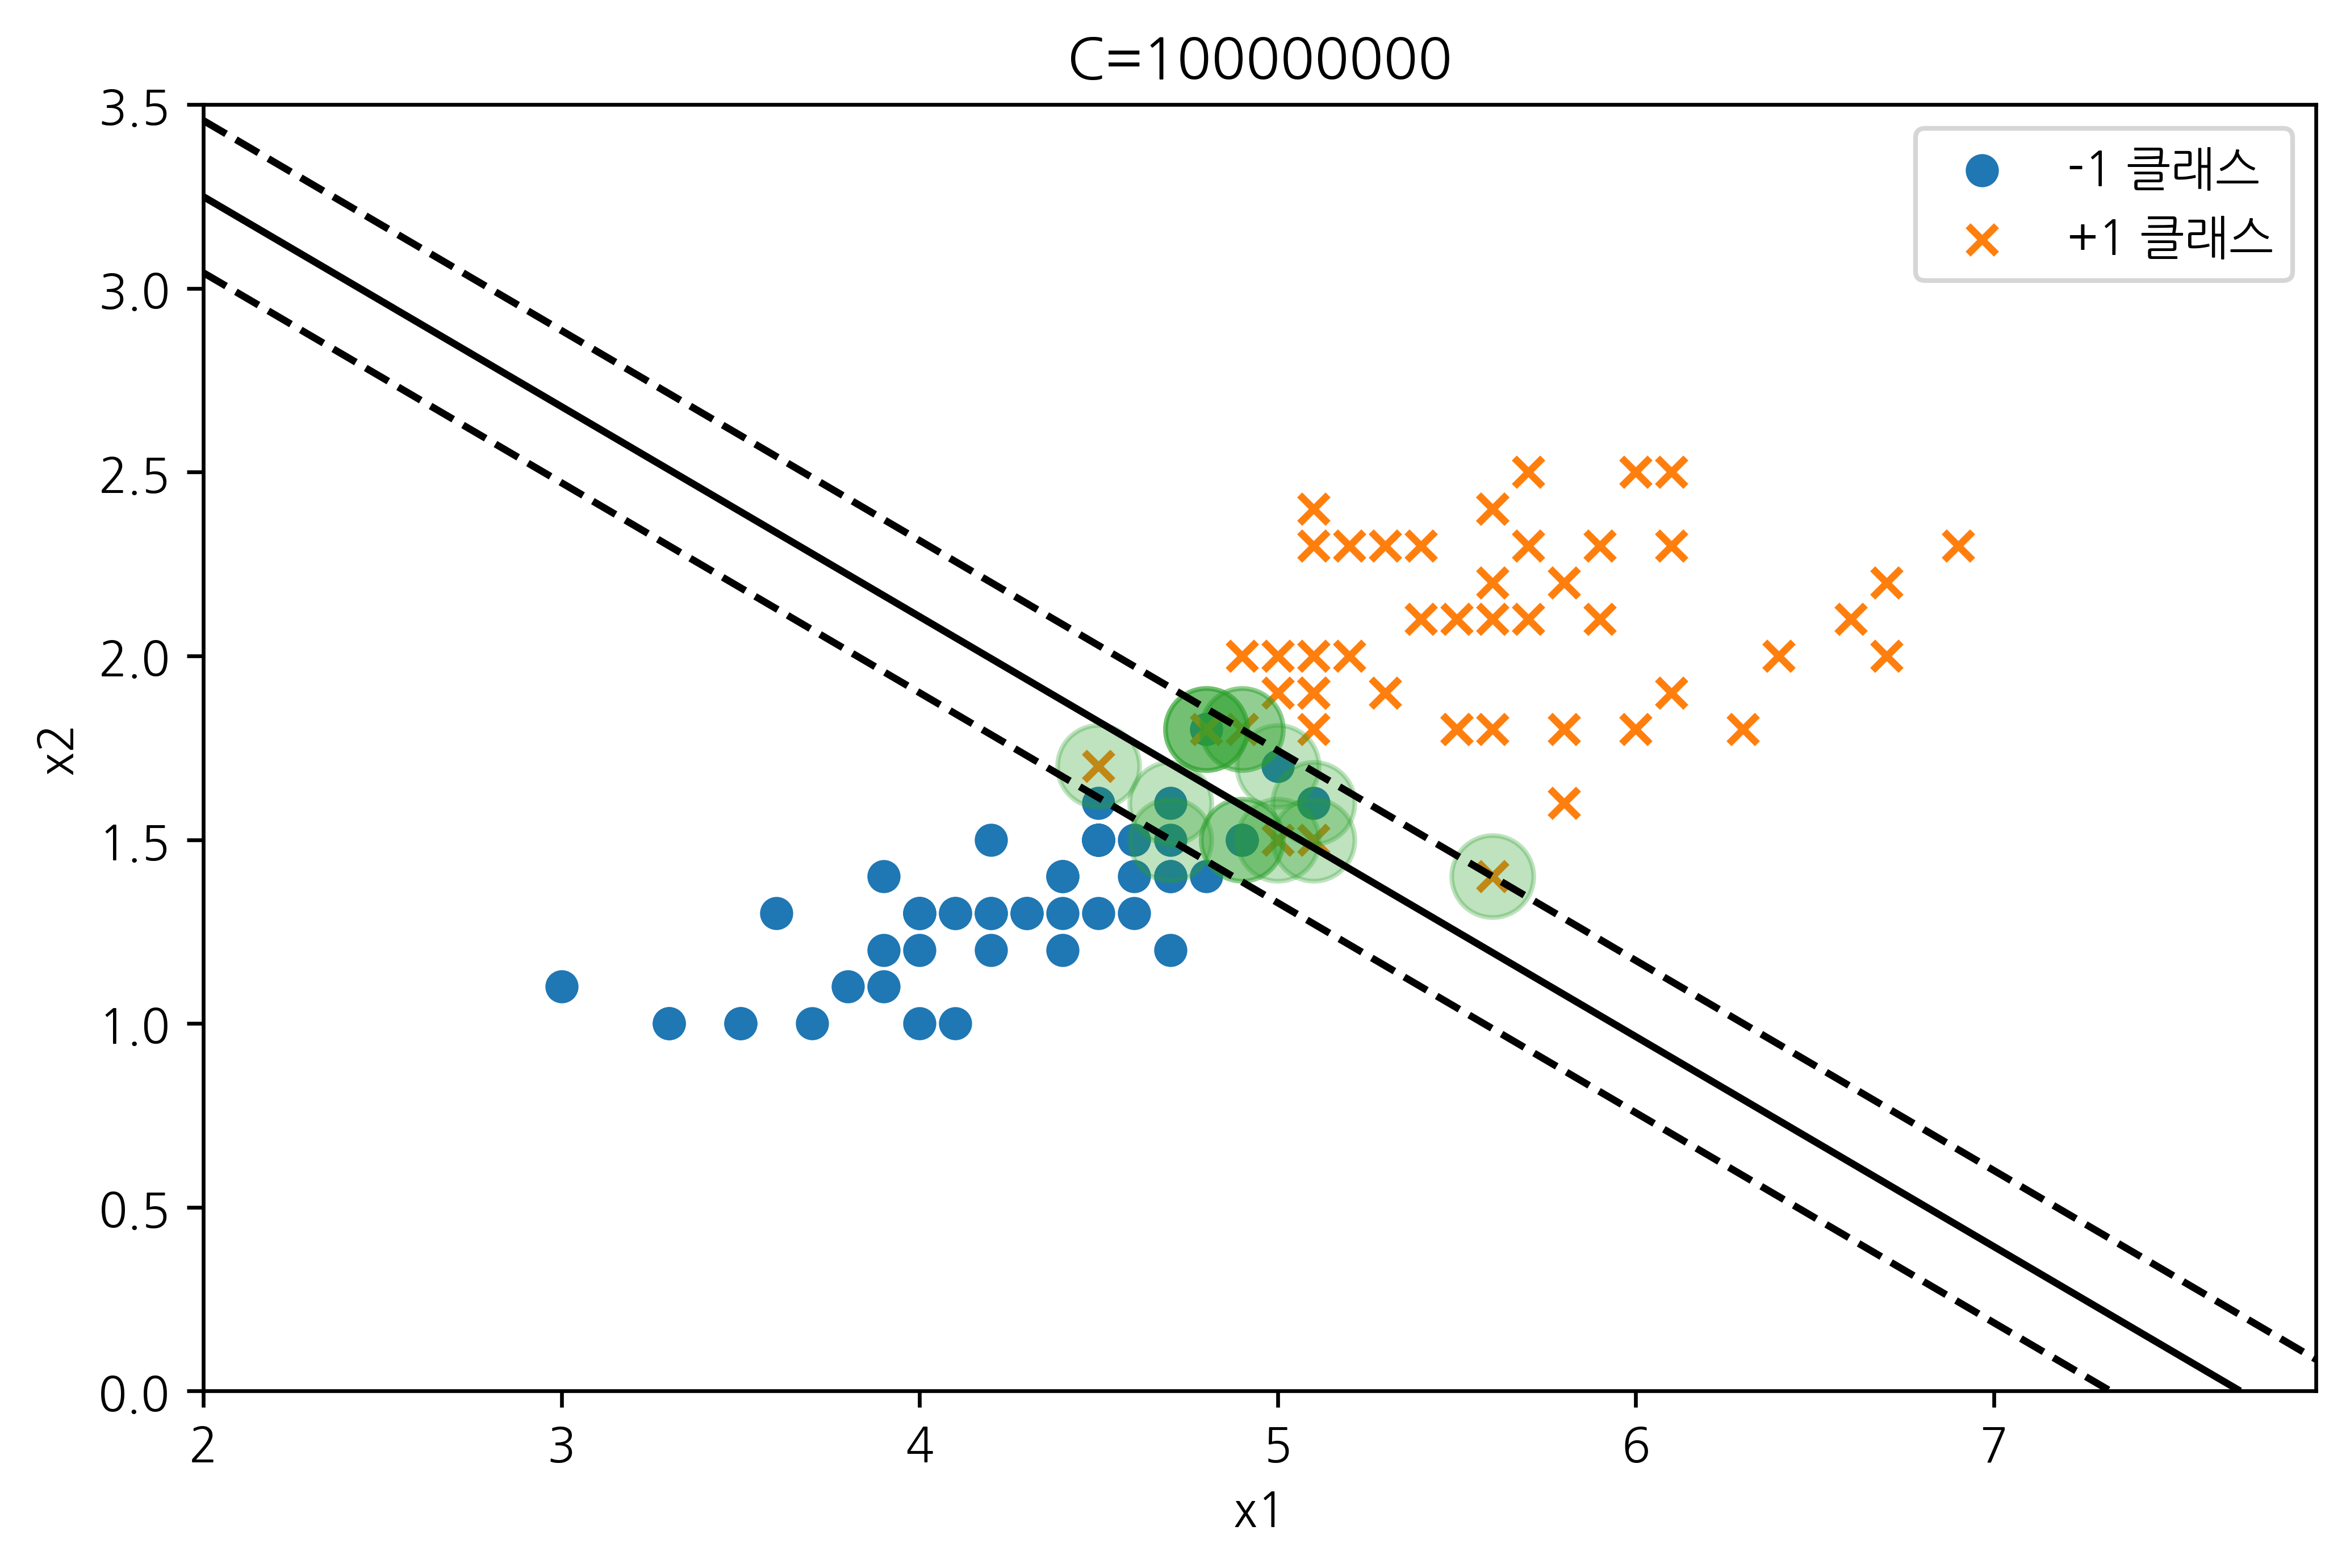

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [1, 2])  ## virginica & versicolour
X = iris.data[idx, 2:4]   ## 꽃잎의 길이와 폭만 사용
y = (iris.target[idx] / 2).astype(np.int)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
xx = np.linspace(XX_min, XX_max)
yy = np.linspace(YY_min, YY_max)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=10).fit(X, y)

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', label="-1 클래스")
plt.scatter(X[y==1, 0], X[y==1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("C=100000000")

plt.show()

연습문제 3

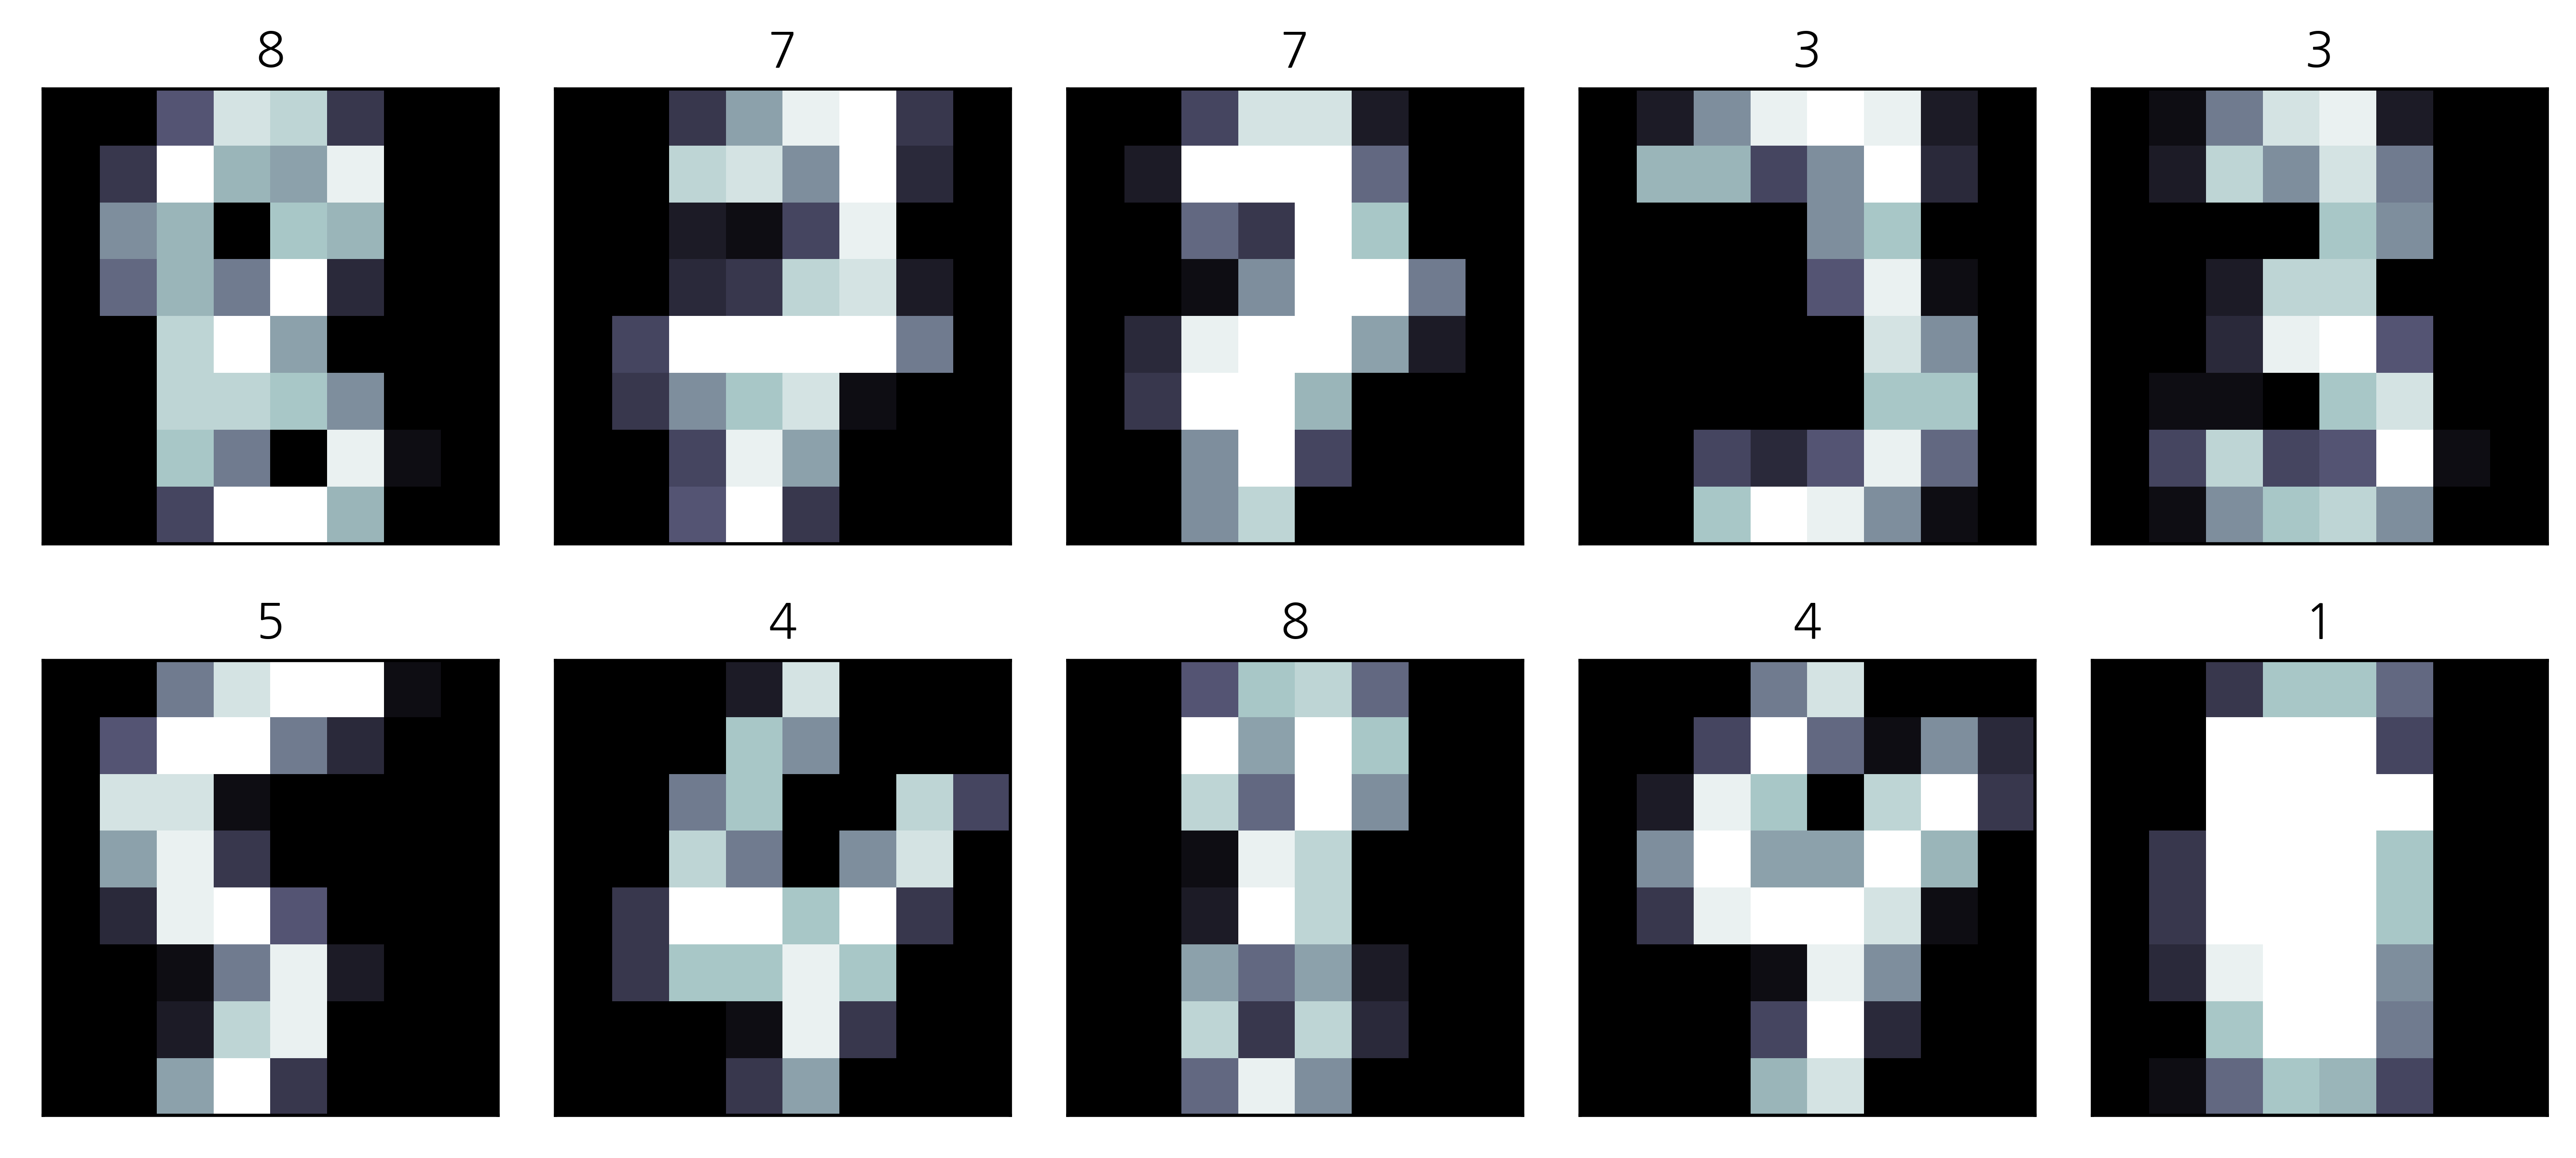

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(digits.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target[k])
plt.tight_layout()
plt.show()

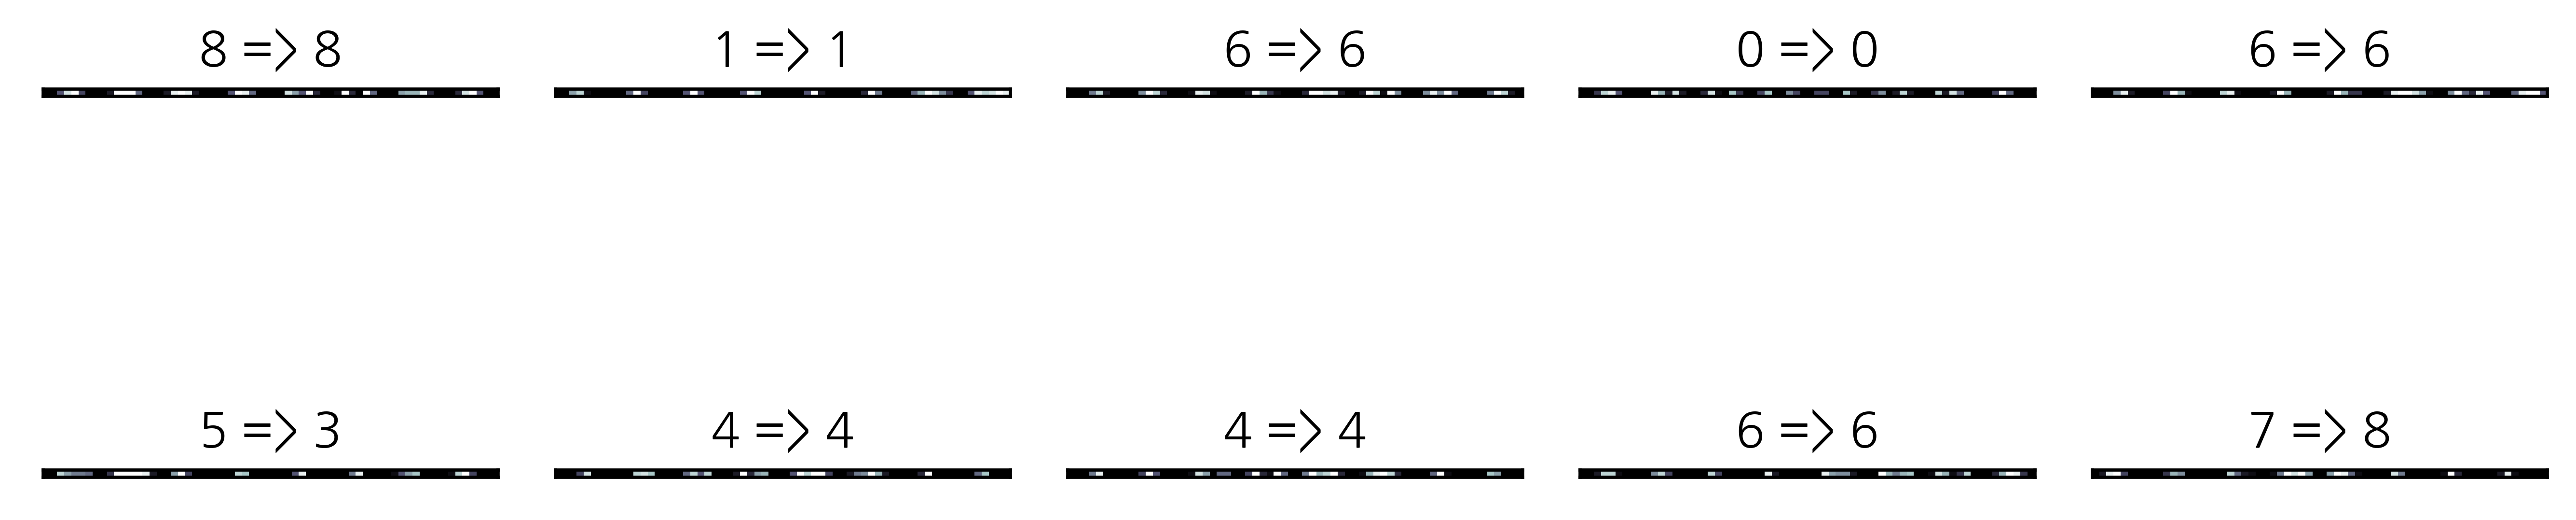

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %
                  (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [27]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00       118
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00       105
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00       106

    accuracy                           1.00      1078
   macro avg       1.00      1.00      1.00      1078
weighted avg       1.00      1.00      1.00      1078



In [28]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      0.97      0.96        73
           2       1.00      0.99      0.99        71
           3       0.95      0.99      0.97        70
           4       0.98      1.00      0.99        63
           5       0.97      0.97      0.97        89
           6       0.99      0.99      0.99        76
           7       1.00      0.98      0.99        65
           8       0.96      0.92      0.94        78
           9       0.97      0.96      0.97        74

    accuracy                           0.97       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.97      0.97       719

